<img src="https://raw.githubusercontent.com/retkowsky/images/master/logo%20azure%20cog%20svcs.jpg">

Documentation : https://azure.microsoft.com/en-us/services/cognitive-services/

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
import datetime
now = datetime.datetime.now()
print(now)

2020-07-07 14:10:30.544404


# OCR

In [3]:
import requests
import time

# If you are using a Jupyter notebook, uncomment the following line.
#%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from PIL import Image
from io import BytesIO

# Replace <Subscription Key> with your valid subscription key.
subscription_key = "AREMPLACER"
assert subscription_key

In [4]:
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"

In [5]:
# Set image_url to the URL of an image that you want to analyze.
image_url = "https://raw.githubusercontent.com/retkowsky/OCR/master/OCR2.jpg"

<img src="https://raw.githubusercontent.com/retkowsky/OCR/master/OCR2.jpg">

In [6]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [7]:

# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

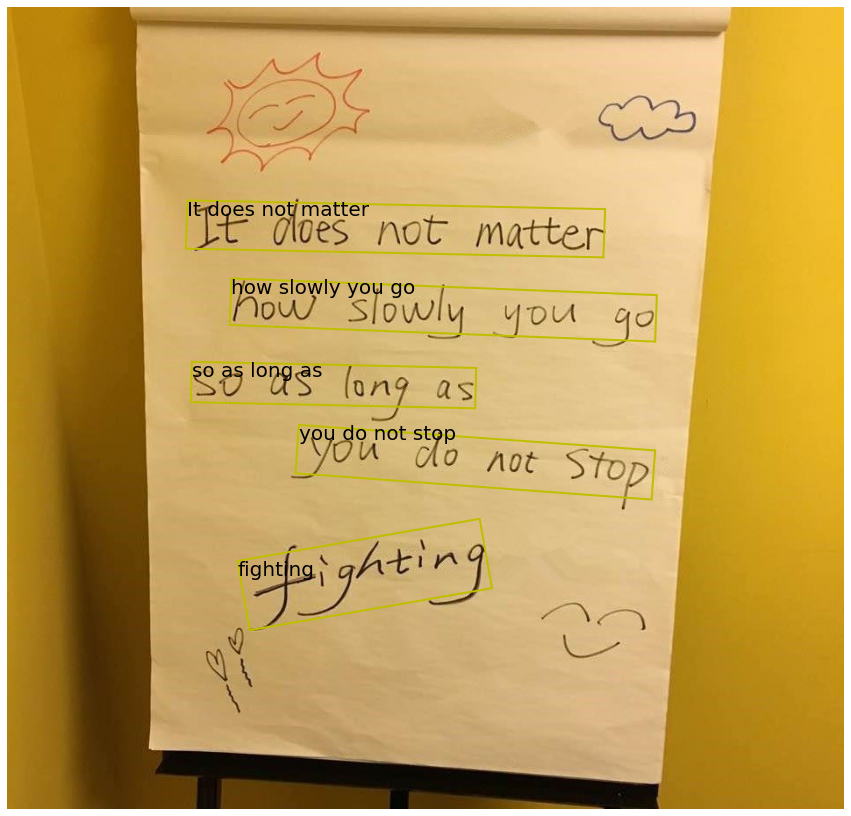

In [8]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")

In [16]:
# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"


# Set image_url to the URL of an image that you want to analyze.
image_url = "https://github.com/retkowsky/images/blob/master/ID_FRA.jpg?raw=true"


headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

<img src="https://github.com/retkowsky/images/blob/master/ID_FRA.jpg?raw=true">

In [17]:
# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

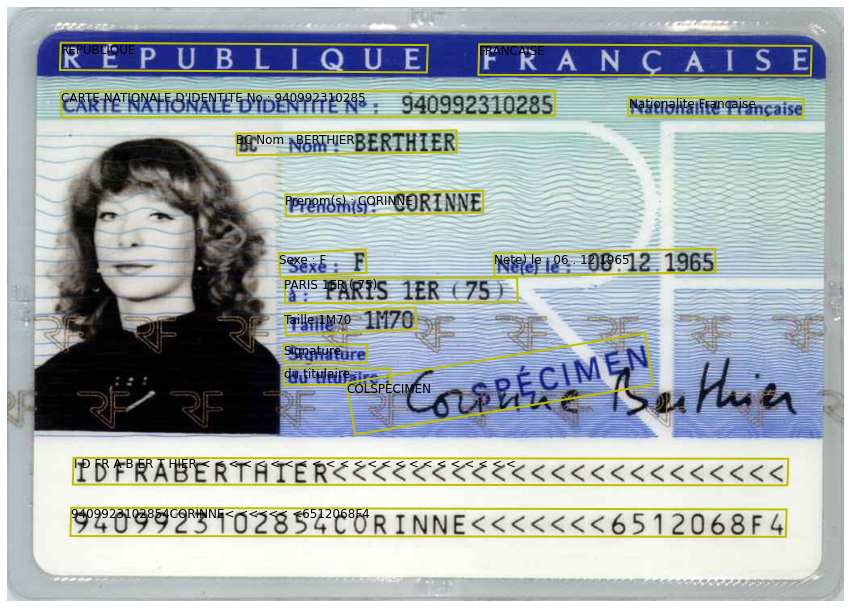

In [18]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=12, va="top")
_ = plt.axis("off")

In [19]:
# You must use the same region in your REST call as you used to get your
# subscription keys. For example, if you got your subscription keys from
# westus, replace "westcentralus" in the URI below with "westus".
#
# Free trial subscription keys are generated in the "westus" region.
# If you use a free trial subscription key, you shouldn't need to change
# this region.
vision_base_url = "https://westeurope.api.cognitive.microsoft.com/vision/v2.0/"

text_recognition_url = vision_base_url + "recognizeText"


# Set image_url to the URL of an image that you want to analyze.
image_url = "https://github.com/retkowsky/images/blob/master/immatriculation.jpg?raw=true"


headers = {'Ocp-Apim-Subscription-Key': subscription_key}
# Note: The request parameter changed for APIv2.
# For APIv1, it is 'handwriting': 'true'.
params  = {'mode': 'Handwritten'}
data    = {'url': image_url}
response = requests.post(
    text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

<img src="https://github.com/retkowsky/images/blob/master/immatriculation.jpg?raw=true">

In [22]:
# Extracting handwritten text requires two API calls: One call to submit the
# image for processing, the other to retrieve the text found in the image.

# Holds the URI used to retrieve the recognized text.
operation_url = response.headers["Operation-Location"]

# The recognized text isn't immediately available, so poll to wait for completion.
analysis = {}
poll = True
while (poll):
    response_final = requests.get(
        response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)
    if ("recognitionResult" in analysis):
        poll= False 
    if ("status" in analysis and analysis['status'] == 'Failed'):
        poll= False

polygons=[]
if ("recognitionResult" in analysis):
    # Extract the recognized text, with bounding boxes.
    polygons = [(line["boundingBox"], line["text"])
        for line in analysis["recognitionResult"]["lines"]]

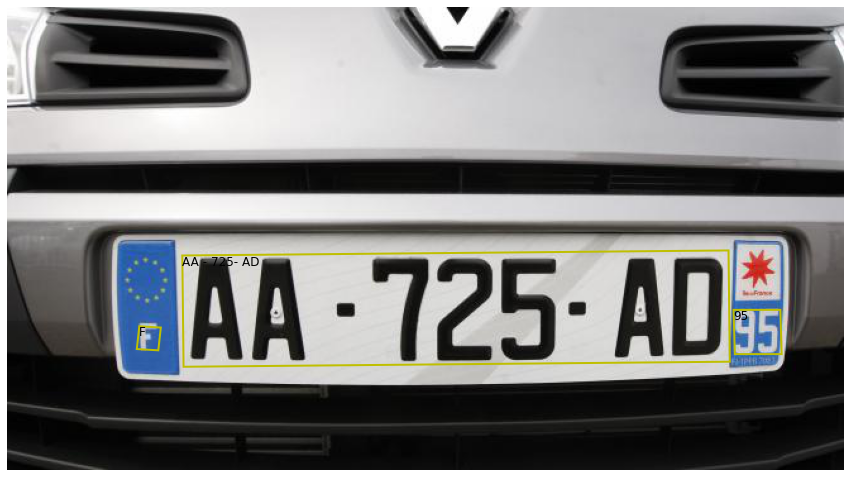

In [23]:
# Display the image and overlay it with the extracted text.
plt.figure(figsize=(15, 15))
image = Image.open(BytesIO(requests.get(image_url).content))
ax = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1])
        for i in range(0, len(polygon[0]), 2)]
    text     = polygon[1]
    patch    = Polygon(vertices, closed=True, fill=False, linewidth=2, color='y')
    ax.axes.add_patch(patch)
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=12, va="top")
_ = plt.axis("off")